# Additional Evaluation for "Reproducibility protocol for ANN-Benchmarks: A benchmarking tool for approximate nearest neighbor search algorithms"

In the reproducibility companion paper to 

> 	Martin Aumüller, Erik Bernhardsson, Alexander John Faithfull: ANN-Benchmarks: A benchmarking tool for approximate nearest neighbor algorithms. Inf. Syst. 87 (2020)

we describe how to run the experiments and build a version of this paper using freshly reproduced results. In this Jupyter notebook, we provide additional thoughts on how to compare these experimental results. The bottom of the notebook contains the code to (re-)produce the tables in the companion paper.

## Importing data

https://zenodo.org/record/5613101 contains the two result `csv` files that summarize the experiments carried out in the original paper and the reproducibility setup. They were carried out on different machines and thus the timings (which are the main performance metric considered in the paper) are likely to change.

In the following, we provide some ideas for a comparison. 

In [60]:
import pandas as pd 

pd.set_option("display.max_rows", 300)
dfo = pd.read_csv("res-original.csv")[["algorithm", "dataset", "count", "batch", "qps", 'k-nn', 'filename']]
dfr = pd.read_csv("res-reproduced.csv")[["algorithm", "dataset", "count", "batch", "qps", "k-nn", 'filename']]

In the following, we will join the two dataframes and consider differences in the achieved recall and the achieved throughput (QPS).

In [37]:
cmp_df = pd.merge(dfo, dfr, on=['filename', 'count', 'batch', 'dataset', 'algorithm'])
print(len(cmp_df), "results joined.")

3147 results joined.


### Differences in throughput

In the following, we analyze the difference in the achieved throughput, measured in queries-per-second.

<AxesSubplot:xlabel='dataset'>

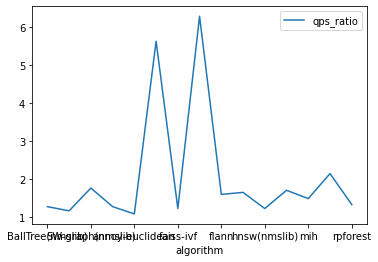

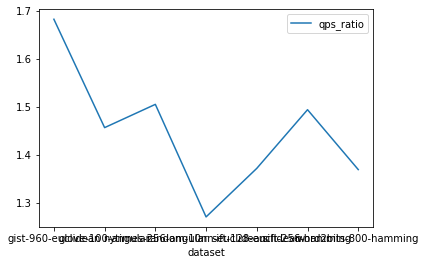

In [50]:
cmp_df['qps_ratio'] = cmp_df['qps_x'] / cmp_df['qps_y']
#cmp_df.plot(kind='bar', x="algorithm", y='qps_ratio')
cmp_df[(cmp_df["k-nn_x"] > 0.5) & (cmp_df["k-nn_y"] > 0.5)][['algorithm', 'qps_ratio']].groupby(['algorithm']).median().plot()
cmp_df[(cmp_df["k-nn_x"] > 0.5) & (cmp_df["k-nn_y"] > 0.5)][['dataset', 'qps_ratio']].groupby(['dataset']).median().plot()

Let's get a more detailed overview. As we see in the following, `bruteforce-blas` and `faiss-ivf-gpu` are outliers, which is explained by the very different hardware that the experiments were running on.

In [65]:
cmp_df[(cmp_df["k-nn_x"] > 0.9) & (cmp_df["k-nn_y"] > 0.9) & (cmp_df['batch']==False) & (cmp_df['count'] == 10)][['algorithm', 'dataset', 'qps_ratio']].groupby(['algorithm', 'dataset']).describe()

qps_ratio                      \
                                           count      mean       std   
algorithm        dataset                                               
BallTree(nmslib) gist-960-euclidean          5.0  8.106632  9.292885   
                 glove-100-angular           3.0  1.145286  0.019669   
                 random-10nn-euclidean       4.0  1.362298  0.253828   
                 sift-128-euclidean          4.0  1.223905  0.048833   
NGT-onng         gist-960-euclidean          3.0  1.112006  0.059713   
                 glove-100-angular           2.0  1.485802  0.033794   
                 random-10nn-euclidean       6.0  1.000000  0.000000   
                 sift-128-euclidean          2.0  1.252390  0.010357   
SW-graph(nmslib) gist-960-euclidean         12.0  8.336377  8.488748   
                 glove-100-angular           9.0  1.726392  0.061865   
                 random-10nn-euclidean      16.0  1.685302  0.229999   
                 sift-128-euclidean         14.0  1.517438  0.104375   
annoy            gist-960-euclidean          9.0  5.118428  3.934500   
                 glove-100-angular          12.0  1.188359  0.073976   
                 random-10nn-euclidean      35.0  1.567441  0.357392   
                 sift-128-euclidean         20.0  1.264097  0.120791   
                 sift-256-hamming           26.0  1.288974  0.148210   
                 word2bits-800-hamming      13.0  1.081782  0.061506   
annoy-euclidean  sift-256-hamming           24.0  1.068264  0.091058   
                 word2bits-800-hamming      18.0  1.001446  0.063850   
bruteforce-blas  glove-100-angular           1.0  5.622455       NaN   
faiss-ivf        gist-960-euclidean         30.0  1.394214  0.192261   
                 glove-100-angular          24.0  1.230786  0.076290   
                 random-10nn-euclidean      39.0  0.529522  0.270531   
                 sift-128-euclidean         35.0  1.078238  0.069957   
                 sift-256-hamming           40.0  5.082162  0.595877   
                 word2bits-800-hamming      37.0  5.152851  0.313022   
flann            glove-100-angular           2.0  1.452803  0.115703   
                 random-10nn-euclidean       2.0  0.553477  0.266833   
hnsw(faiss)      gist-960-euclidean         36.0  1.708357  0.272090   
                 glove-100-angular          34.0  1.625968  0.214999   
                 random-10nn-euclidean       7.0  0.855781  0.030627   
                 sift-128-euclidean         61.0  1.622898  0.273942   
hnsw(nmslib)     glove-100-angular          15.0  0.969394  0.018987   
                 sift-128-euclidean         32.0  1.167017  0.188168   
kgraph           gist-960-euclidean         10.0  1.730057  0.033182   
                 glove-100-angular          15.0  1.693583  0.078830   
                 random-10nn-euclidean      15.0  1.524425  0.109127   
                 sift-128-euclidean         12.0  1.879296  0.029730   
mih              sift-256-hamming            6.0  2.063144  0.730831   
                 word2bits-800-hamming       9.0  1.408336  0.427865   
pynndescent      gist-960-euclidean          6.0  1.914360  0.171250   
                 glove-100-angular           8.0  1.728005  0.066032   
                 random-10nn-euclidean      41.0  1.604452  0.741902   
                 sift-128-euclidean         16.0  2.419096  0.568870   
rpforest         glove-100-angular           1.0  1.322618       NaN   

                                                                      \
                                             min       25%       50%   
algorithm        dataset                                               
BallTree(nmslib) gist-960-euclidean     1.323938  1.389618  1.435481   
                 glove-100-angular      1.122575  1.139534  1.156492   
                 random-10nn-euclidean  1.136742  1.162908  1.321732   
                 sift-128-euclidean     1.169193  1.189536  1.229406   
NGT-on

In [67]:
cmp_df[cmp_df['qps_ratio'] > 10] # let's see where differences are most extreme

,algorithm,dataset,count,batch,qps_x,k-nn_x,filename,qps_y,k-nn_y,qps_ratio
1533,SW-graph(nmslib),gist-960-euclidean,10,False,114.022067,0.96450,euclidean_sw_graph_NN_24_false_100.hdf5,4.357446,0.96090,26.167180
1534,SW-graph(nmslib),gist-960-euclidean,10,False,328.045566,0.73640,euclidean_sw_graph_NN_24_false_15.hdf5,7.279628,0.73450,45.063508
1538,SW-graph(nmslib),gist-960-euclidean,10,False,286.902110,0.78240,euclidean_sw_graph_NN_24_false_20.hdf5,8.280804,0.78250,34.646650
1545,SW-graph(nmslib),gist-960-euclidean,10,False,71.111100,0.99000,euclidean_sw_graph_NN_24_false_200.hdf5,4.374665,0.98950,16.255209
1553,SW-graph(nmslib),gist-960-euclidean,10,False,27.358858,0.99910,euclidean_sw_graph_NN_24_false_800.hdf5,1.911992,0.99920,14.309085
1559,SW-graph(nmslib),gist-960-euclidean,10,False,43.965230,0.99730,euclidean_sw_graph_NN_24_false_400.hdf5,2.987359,0.99710,14.717091
1564,SW-graph(nmslib),gist-960-euclidean,10,False,383.220577,0.66470,euclidean_sw_graph_NN_24_false_10.hdf5,6.994511,0.66190,54.788758
1567,SW-graph(nmslib),gist-960-euclidean,10,False,176.417893,0.90710,euclidean_sw_graph_NN_24_false_50.hdf5,11.620232,0.90490,15.181960
1568,SW-graph(nmslib),gist-960-euclidean,10,False,233.781171,0.84660,euclidean_sw_graph_NN_24_false_30.hdf5,10.260635,0.84570,22.784278
1612,faiss-ivf,gist-960-euclidean,10,False,45.179958,0.82170,euclidean_128_5.hdf5,0.545465,0.82710,82.828303


### Differences in the achieved recall 



In [ ]:
cmp_df['k-nn-diff'] = cmp_df['k-nn_x'] -  cmp_df['k-nn_y']
print(len(cmp_df[cmp_df['k-nn-diff'] > 0.1]), "results have more than .1 better recall in the original setup. These are: ")
print(cmp_df[cmp_df['k-nn-diff'] > 0.1])

Next, we do it the other way around.

In [35]:
print(len(cmp_df[cmp_df['k-nn-diff'] < -0.1]), "results have more than .1 better recall in the reproduced setup. These are: ")
print("This happened on the following datasets", set(cmp_df[cmp_df['k-nn-diff'] < -0.1]["dataset"]))
print(cmp_df[cmp_df['k-nn-diff'] < -0.1])


228 results have more than .1 better recall in the reproduced setup. These are: 
This happened on the following datasets {'random-10nn-euclidean', 'nytimes-256-angular', 'sift-128-euclidean'}
         algorithm                dataset  count  batch        qps_x  \
1212         flann     sift-128-euclidean    100  False   860.298845   
2221  hnsw(nmslib)  random-10nn-euclidean     10  False   601.318941   
2222  hnsw(nmslib)  random-10nn-euclidean     10  False  2130.538497   
2226  hnsw(nmslib)  random-10nn-euclidean     10  False   376.057132   
2227  hnsw(nmslib)  random-10nn-euclidean     10  False   968.688792   
...            ...                    ...    ...    ...          ...   
2875        kgraph    nytimes-256-angular     10  False   310.510065   
2876        kgraph    nytimes-256-angular     10  False  1252.120599   
2877        kgraph    nytimes-256-angular     10  False   494.700449   
2878        kgraph    nytimes-256-angular     10  False   353.946320   
2879        kgra

## Ranking of algorithms at a certain recall level

In [68]:
def get_best(df, recall=0.9):
    return df[df["k-nn"] > recall].groupby(['algorithm', 'dataset', 'count', 'batch']).max().reset_index()

dfo_best = get_best(dfo)
dfr_best = get_best(dfr)

In [69]:
total_df = pd.merge(dfo_best, dfr_best, on=["algorithm", "dataset", "count", "batch"])
total_df['ratio'] = total_df['qps_x'] / total_df['qps_y']

In the following table, we sort algorithms according their best performance above recall 0.9. We sort by performance in the original experiments, and a visual comparison can be made to the 

In [81]:
best_o = total_df[(total_df['count'] == 10) & (total_df['batch']==False)].sort_values(by=['dataset', 'count', 'batch', 'qps_x'],ascending=False)[['algorithm', 'dataset', 'qps_x', 'qps']].reset_index()

## Reproducing tables in the paper

The reproducibility papers contains some additional tables in the appendix that have been generated directly from the result files. These tables were generated from the following code.

In [17]:
df = pd.read_csv("res_2020.csv")
df['indexsize'] = round(df['indexsize'] / 1e6, 2)
df['build'] = round(df['build'] / (60 * 60), 2)
df['search_time'] = 10000 / df['qps']
search_df = df[["algorithm", "dataset", "count", "batch", "search_time"]].groupby(["algorithm", "dataset", "count", "batch"]).sum().reset_index()
search_df['search_time'] = round(5 * df['search_time'] / (60 * 60), 2)
search_df['build_time'] = df[["algorithm", "dataset", "count", "batch", "build"]].drop_duplicates().groupby(["algorithm", "dataset", "count", "batch"]).sum().reset_index()['build']
search_df['index_size'] = df[["algorithm", "dataset", "count", "batch", "indexsize"]].groupby(["algorithm", "dataset", "count", "batch"]).max().reset_index()['indexsize']
search_df['total'] = search_df['search_time'] + search_df['build_time']
search_df

,algorithm,dataset,count,batch,search_time,build_time,index_size,total
0,BallTree(nmslib),gist-960-euclidean,10,False,0.01,7.93,3.77,7.94
1,BallTree(nmslib),gist-960-euclidean,100,False,0.20,4.08,7.96,4.28
2,BallTree(nmslib),glove-100-angular,10,False,0.03,1.37,1.36,1.40
3,BallTree(nmslib),glove-100-angular,100,False,0.01,1.47,1.36,1.48
4,BallTree(nmslib),nytimes-256-angular,10,False,0.02,3.61,0.82,3.63
...,...,...,...,...,...,...,...,...
102,pynndescent,sift-256-hamming,10,False,0.07,2.89,6.22,2.96
103,pynndescent,word2bits-800-hamming,10,False,0.00,1.70,4.01,1.70
104,rpforest,glove-100-angular,10,False,0.01,9.47,19.90,9.48
105,rpforest,glove-100-angular,100,False,0.00,7.29,19.31,7.29


The following command produces Table A.12 in the appendix.

In [19]:
print(search_df[["algorithm", "dataset", "count", "batch", "index_size", "build_time", "total"]].to_latex(longtable=True, index=False))

\begin{longtable}{llrlrrr}
\toprule
        algorithm &                dataset &  count &  batch &  index\_size &  build\_time &  total \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
 BallTree(nmslib) &     gist-960-euclidean &     10 &  False &        3.77 &        7.93 &   7.94 \\
 BallTree(nmslib) &     gist-960-euclidean &    100 &  False &        7.96 &        4.08 &   4.28 \\
 BallTree(nmslib) &      glove-100-angular &     10 &  False &        1.36 &        1.37 &   1.40 \\
 BallTree(nmslib) &      glove-100-angular &    100 &  False &        1.36 &        1.47 &   1.48 \\
 BallTree(nmslib) &    nytimes-256-angular &     10 &  False &        0.82 &        3.61 &   3.63 \\
 BallTree(nmslib) &  random-10nn-euclidean &     10 &  False &        1.98 &        3.50 &   3.55 \\
 BallTree(nmslib) &     sift-128-euclidean &     10 &  False &        1.39 &        0.48 &   0.69 \\
 BallTree(nmslib) &     sift-128-eu